In [1]:
import pandas as pd 
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1']    = [1,2,3,4,5,6,6,7,9,9]
df['X2']    = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [5]:
import seaborn as sns

<AxesSubplot:xlabel='X1', ylabel='X2'>

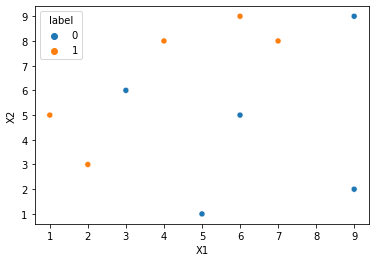

In [6]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [7]:
df['weights'] = 1/df.shape[0]

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)
# at here we select parameter max_depth =1 because , in adaboost we use decision stumps . 

In [10]:
x = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [11]:
# step-2 train 1st model.
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

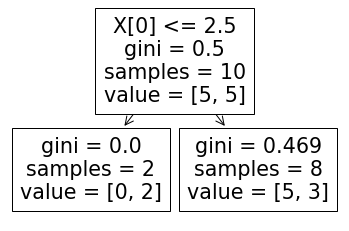

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

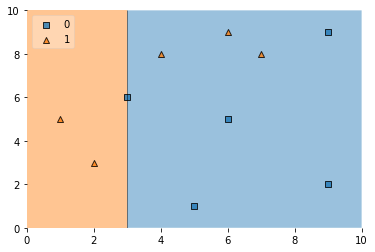

In [13]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [14]:
df['y_pred'] = dt1.predict(x)

In [15]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [16]:
def calculate_model_weight(error):
    return 0.5 * np.log((1-error)/error)

In [17]:
# step-3 calculate the model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [18]:
# setp-4 update the weight

def update_model_weight(row,alpha=0.42364893019360184):
    
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else : 
        return row['weights'] * np.exp(alpha)

In [19]:
df['updated_weights'] = df.apply(update_model_weight,axis=1)

In [20]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,0,0.065465
3,4,8,1,0.1,0,0.152753
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,0,0.152753
6,6,5,0,0.1,0,0.065465
7,7,8,1,0.1,0,0.152753
8,9,9,0,0.1,0,0.065465
9,9,2,0,0.1,0,0.065465


In [21]:
df['updated_weights'].sum()
# SUM SHOULD BE EQUAL TO 1

0.9165151389911682

In [22]:
df['normalized_weight'] = df['updated_weights']/df['updated_weights'].sum()

In [23]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weight
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
6,6,5,0,0.1,0,0.065465,0.071429
7,7,8,1,0.1,0,0.152753,0.166667
8,9,9,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429


In [24]:
df['normalized_weight'].sum()

0.9999999999999999

In [27]:
df['cumsum_upper'] = np.cumsum(df['normalized_weight'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weight']

In [28]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.071429,0.142857,0.071429
2,3,6,0,0.1,0,0.065465,0.071429,0.214286,0.142857
3,4,8,1,0.1,0,0.152753,0.166667,0.380952,0.214286
4,5,1,0,0.1,0,0.065465,0.071429,0.452381,0.380952
5,6,9,1,0.1,0,0.152753,0.166667,0.619048,0.452381
6,6,5,0,0.1,0,0.065465,0.071429,0.690476,0.619048
7,7,8,1,0.1,0,0.152753,0.166667,0.857143,0.690476
8,9,9,0,0.1,0,0.065465,0.071429,0.928571,0.857143
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [29]:
def create_new_dataset(df):
    indecies = []
    
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indecies.append(index)
    return indecies

In [37]:
index_values = create_new_dataset(df)
index_values

[5, 4, 6, 3, 3, 7, 5, 0, 0, 8]

In [38]:
secound_df = df.iloc[index_values,[0,1,2,3]]

In [39]:
secound_df

,X1,X2,label,weights
5,6,9,1,0.1
4,5,1,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
8,9,9,0,0.1


In [40]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [41]:
x = secound_df.iloc[:,0:2].values
y = secound_df.iloc[:,2].values

In [43]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 4.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]')]

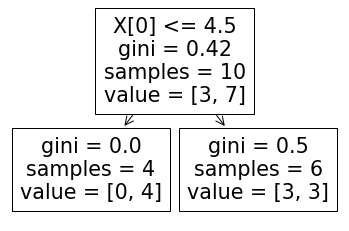

In [44]:
plot_tree(dt2)

<AxesSubplot:>

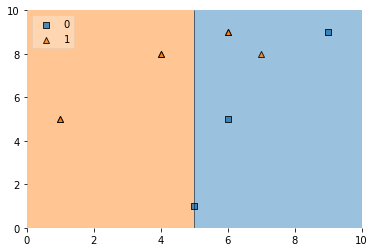

In [46]:
plot_decision_regions(x,y,clf=dt2,legend=2)

In [47]:
secound_df['y_pred'] = dt2.predict(x)

In [48]:
secound_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,0
4,5,1,0,0.1,0
6,6,5,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,0
5,6,9,1,0.1,0
0,1,5,1,0.1,1
0,1,5,1,0.1,1
8,9,9,0,0.1,0


In [52]:
alpha2 = calculate_model_weight(0.3)

In [53]:
alpha2

0.42364893019360184

In [54]:
def update_model_weight(row,alpha=0.42364893019360184):
    
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else : 
        return row['weights'] * np.exp(alpha)

In [55]:
secound_df['updated_weights'] = secound_df.apply(update_model_weight,axis=1)

In [56]:
secound_df

,X1,X2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,0,0.152753
4,5,1,0,0.1,0,0.065465
6,6,5,0,0.1,0,0.065465
3,4,8,1,0.1,1,0.065465
3,4,8,1,0.1,1,0.065465
7,7,8,1,0.1,0,0.152753
5,6,9,1,0.1,0,0.152753
0,1,5,1,0.1,1,0.065465
0,1,5,1,0.1,1,0.065465
8,9,9,0,0.1,0,0.065465


In [58]:
secound_df['updated_weights'].sum()

0.9165151389911682

In [59]:
secound_df['normalized_weight'] = secound_df['updated_weights']/secound_df['updated_weights'].sum()

In [60]:
secound_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weight
5,6,9,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
6,6,5,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,1,0.065465,0.071429
3,4,8,1,0.1,1,0.065465,0.071429
7,7,8,1,0.1,0,0.152753,0.166667
5,6,9,1,0.1,0,0.152753,0.166667
0,1,5,1,0.1,1,0.065465,0.071429
0,1,5,1,0.1,1,0.065465,0.071429
8,9,9,0,0.1,0,0.065465,0.071429


In [62]:
secound_df['normalized_weight'].sum()

0.9999999999999999

In [63]:
secound_df['cumsum_upper'] = np.cumsum(secound_df['normalized_weight'])
secound_df['cumsum_lower'] = secound_df['cumsum_upper'] - secound_df['normalized_weight']

In [64]:
secound_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weight,cumsum_upper,cumsum_lower
5,6,9,1,0.1,0,0.152753,0.166667,0.166667,0.000000
4,5,1,0,0.1,0,0.065465,0.071429,0.238095,0.166667
6,6,5,0,0.1,0,0.065465,0.071429,0.309524,0.238095
3,4,8,1,0.1,1,0.065465,0.071429,0.380952,0.309524
3,4,8,1,0.1,1,0.065465,0.071429,0.452381,0.380952
7,7,8,1,0.1,0,0.152753,0.166667,0.619048,0.452381
5,6,9,1,0.1,0,0.152753,0.166667,0.785714,0.619048
0,1,5,1,0.1,1,0.065465,0.071429,0.857143,0.785714
0,1,5,1,0.1,1,0.065465,0.071429,0.928571,0.857143
8,9,9,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [66]:
index_values = create_new_dataset(secound_df)

In [68]:
third_df = secound_df.iloc[index_values,[0,1,2,3]]

In [69]:
third_df

,X1,X2,label,weights
5,6,9,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
5,6,9,1,0.1


In [72]:
dt3 = DecisionTreeClassifier(max_depth=1)

x = secound_df.iloc[:,0:2].values
y = secound_df.iloc[:,2].values

dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot:>

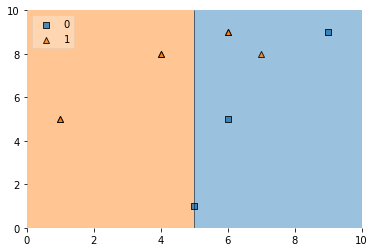

In [74]:
plot_decision_regions(x, y, clf=dt3, legend=2)

In [77]:
third_df['y_pred'] = dt3.predict(x)

In [78]:
third_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,0
0,1,5,1,0.1,0
3,4,8,1,0.1,0
0,1,5,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,0
0,1,5,1,0.1,0
5,6,9,1,0.1,1
0,1,5,1,0.1,1
5,6,9,1,0.1,0


In [79]:
alpha3 = calculate_model_weight(0.6)
alpha3

-0.20273255405408214

In [80]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.42364893019360184 -0.20273255405408214


# Prediction

In [82]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [83]:
dt2.predict(query)

array([1], dtype=int64)

In [84]:
dt3.predict(query)

array([1], dtype=int64)

In [85]:
alpha1*1 + alpha2*(1) + alpha3*(1)

0.6445653063331216

In [86]:
np.sign(0.6445653063331216)

1.0

In [87]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0], dtype=int64)

In [88]:
dt2.predict(query)

array([0], dtype=int64)

In [89]:
dt3.predict(query)

array([0], dtype=int64)

In [93]:
alpha1*(-1) + alpha2*(-1) + alpha3*(-1)

-0.6445653063331216

In [95]:
np.sign(-0.6445653063331216)

-1.0

In [96]:
#  this is how adaboost works.
# The End .